# Digit recognition in Machine Learning


## Desription

The MNSIT dataset is composed of a set of 42 000 images for trainging with a resolution of 28x28x1 in grayscale.

## Load data


In [161]:
import pandas as pd

df_train = pd.read_csv("Datasets/train.csv")
y = df_train["label"]
X = df_train.drop("label", axis=1)

In [162]:
# df_test = pd.read_csv("Datasets/test.csv")
# y_test = []  # Empty no labels for test data
# X_test = df_test

## Split data

In [163]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Show images info

In [164]:
print(df_train.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [165]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


## Plot images

Plot images as BW with reverse BW.

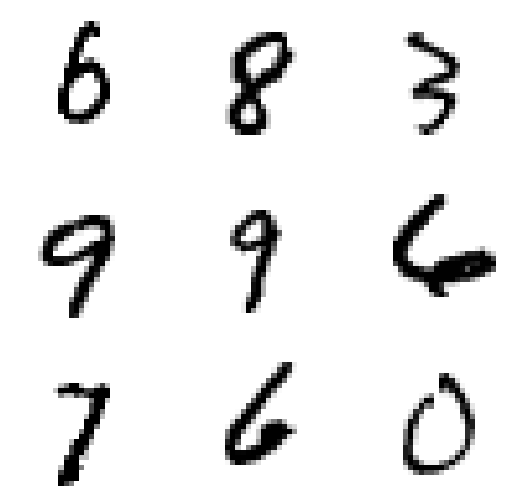

In [166]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train.iloc[i, 0:].values.reshape(28, 28), cmap=plt.cm.gray_r)
    plt.axis("off")
plt.show()

## Images processing

In [167]:
from sklearn.preprocessing import MinMaxScaler

### Feature scaling
## Rescale to -1,+1 in our case 0,+1 because we only have positive pixels' value:
scale = MinMaxScaler()

# fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data.
X_train = scale.fit_transform(X_train)

# Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data.
X_test = scale.transform(X_test)


### OR

### Image binarize
# Convert the image to BW or keep them as grayscale, because grayscale doesn't add any information.


## Data augmentation

## PCA

No use in supervised here.

## Hyper-parameters tuning

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

grid_params = {'n_neighbors': [i for i in range(1, 11)], 'weights': ["uniform", "distance"]}
# grid_params = {'n_neighbors': [i for i in range(1, 11)], 'weights': ["uniform", "distance"]}

gsCV = GridSearchCV(knn, grid_params, verbose=3)

## Hyper parameter tuning

In [169]:
print(gsCV.fit(X_train, y_train))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.965 total time=   3.5s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.965 total time=   3.6s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.966 total time=   3.4s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.961 total time=   3.2s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.965 total time=   3.3s
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.965 total time=   3.1s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.965 total time=   3.1s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.966 total time=   3.1s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.961 total time=   3.1s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.965 total time=   3.1s
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.960 total time=   3.7s
[CV 2/5] END ....n_neighbors=2, weights=uniform

## Choose best model

In [170]:
print(gsCV.best_params_)

{'n_neighbors': 4, 'weights': 'distance'}


In [171]:
print(gsCV.best_score_)

0.9674107142857142


In [172]:
knn = gsCV.best_estimator_

## Train and test chosen model

In [173]:
# Fit
print(knn.fit(X_train, y_train))

KNeighborsClassifier(n_neighbors=4, weights='distance')


In [174]:
# Predict
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

## Results

In [175]:
from sklearn.metrics import accuracy_score


# Accuracies
def print_scores(y_train, y_test, y_pred_train, y_pred_test):
    print(f"Train accuracy: {accuracy_score(y_train, y_pred_train)}.")
    print(f"Test accuracy: {accuracy_score(y_test, y_pred_test)}.")


print_scores(y_train, y_test, y_pred_train, y_pred_test)

Train accuracy: 1.0.
Test accuracy: 0.9677380952380953.


In [176]:
# from sklearn.model_selection import cross_val_score
#
# def print_cross_val_score(model, X, y):
#     cross_val_score(model, X, y, cv=5, scoring='roc_auc')

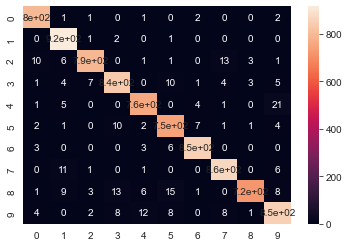

In [177]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Confusion matrix
def print_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.show()


print_confusion_matrix(y_test, y_pred_test)

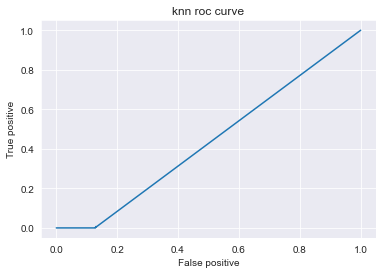

In [178]:
from sklearn.metrics import roc_curve

# ROC curve
def print_roc_curve(X_test, y_test, name, title):
    y_pred_prob = knn.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob , pos_label=9)
    plt.plot(fpr, tpr, label=name)
    plt.xlabel("False positive")
    plt.ylabel("True positive")
    plt.title(title)
    plt.show()

print_roc_curve(X_test, y_test, "KNeighborsClassifier", "knn roc curve")

## Test of other models

Train accuracy: 1.0.
Test accuracy: 0.9602380952380952.


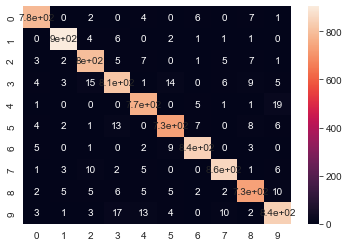

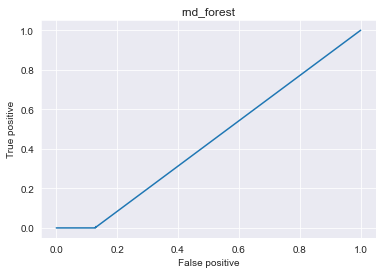

In [179]:
from sklearn.ensemble import RandomForestClassifier

# grid_params = {'n_neighbors': [i for i in range(1, 11)], 'weights': ["uniform", "distance"]}
# gsCV = GridSearchCV(rnd_forest, grid_params, verbose=3)

rnd_forest = RandomForestClassifier()

rnd_forest.fit(X_train, y_train)

y_pred_train = rnd_forest.predict(X_train)
y_pred_test = rnd_forest.predict(X_test)

print_scores(y_train, y_test, y_pred_train, y_pred_test)
print_confusion_matrix(y_test, y_pred_test)
print_roc_curve(X_test, y_test, "RandomForestClassifier", "rnd_forest")

Train accuracy: 0.9888392857142857.
Test accuracy: 0.974047619047619.


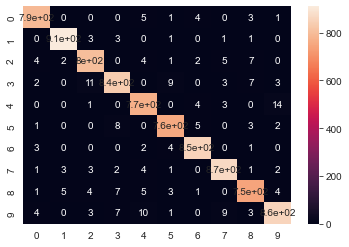

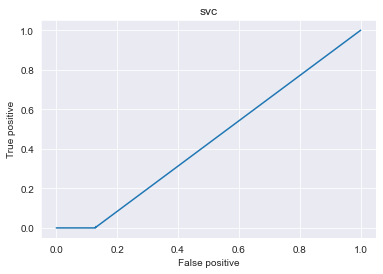

In [180]:
from sklearn import svm

svc = svm.SVC()

# grid_params = {'n_neighbors': [i for i in range(1, 11)], 'weights': ["uniform", "distance"]}
# gsCV = GridSearchCV(rnd_forest, grid_params, verbose=3)

svc.fit(X_train, y_train)

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

print_scores(y_train, y_test, y_pred_train, y_pred_test)
print_confusion_matrix(y_test, y_pred_test)
print_roc_curve(X_test, y_test, "svm", "svc")

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

# grid_params = {'n_neighbors': [i for i in range(1, 11)], 'weights': ["uniform", "distance"]}
# gsCV = GridSearchCV(rnd_forest, grid_params, verbose=3)

dtc.fit(X_train, y_train)

y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

print_scores(y_train, y_test, y_pred_train, y_pred_test)
print_confusion_matrix(y_test, y_pred_test)
print_roc_curve(X_test, y_test, "DecisionTreeClassifier", "dtc")


In [181]:
# from sklearn.naive_bayes import GaussianNB
#
# gnb = GaussianNB()
# gnb.fit(X_train, y_train)
# print(gnb.score(X_train,y_train))
# y_pred = gnb.predict(X_train)
#
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
#
# cm = confusion_matrix(y_train, y_pred)
# sns.heatmap(cm, annot=True)
# plt.show()

## Voting Classifier

Train accuracy: 1.0.
Test accuracy: 0.9721428571428572.


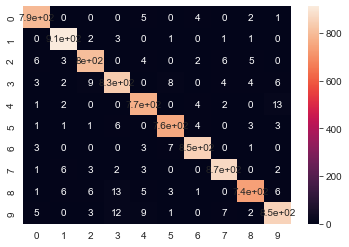

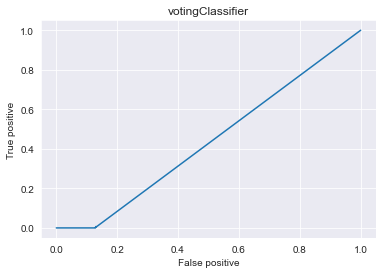

In [184]:
from sklearn.ensemble import VotingClassifier

knn = KNeighborsClassifier(n_neighbors=4,weights='distance')
svc = svm.SVC()
rnd_forest = RandomForestClassifier()

vclf = VotingClassifier(estimators=[('knn', knn), ('svc', svc), ('rnd_forest', rnd_forest)], voting='hard')
vclf.fit(X_train, y_train)

y_pred_test = vclf.predict(X_test)
y_pred_train = vclf.predict(X_train)

print_scores(y_train, y_test, y_pred_train, y_pred_test)
print_confusion_matrix(y_test, y_pred_test)
print_roc_curve(X_test, y_test, "VotingClassifier", "votingClassifier")

## Bagging

In [ ]:
# from sklearn.ensemble import BaggingClassifier
#
# bclf = BaggingClassifier()
#
# # grid_params = {'n_neighbors': [i for i in range(1, 11)], 'weights': ["uniform", "distance"]}
# # gsCV = GridSearchCV(rnd_forest, grid_params, verbose=3)
#
# bclf.fit(X_train, y_train)
#
# y_pred_train = bclf.predict(X_train)
# y_pred_test = bclf.predict(X_test)
#
# print_scores(y_train, y_test, y_pred_train, y_pred_test)
# print_confusion_matrix(y_test, y_pred_test)
# print_roc_curve(X_test, y_test, "DecisionTreeClassifier", "dtc")


## Random Forest

## Boosting

## Stacked models

In [ ]:
# from sklearn.ensemble import StackingClassifier
#
# sclf = StackingClassifier()

## Conclusion